<hr>
<a id='top'></a> 
###  Table of Contents

## <a href='#data_wrangling'>2. Data Wrangling</a>

## <a href='#eda'>3. EDA and Data Storytelling</a>

## <a href='#machine_learning'>4. Machine Learning</a>

### <a href='#knn'>4.1. k-Nearest Neighbor Classifier</a>

### <a href='#gnb'>4.2. Gaussian Naive Bayes Classifier</a>

### <a href='#dtc'>4.3. Decision Trees Classifier</a>

### <a href='#svm'>4.4. Support Vector Machine (SVM) Classifer</a>

### <a href='#sgd'>4.5. Stochastic Gradient Descent (SGD) Classifier</a>

### <a href='#compare'>4.6. Comparing Classifiers</a>

<hr>
## <a id='data_wrangling'>2. Data Wrangling</a> 

In [1]:
# IMPORT PACKAGES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# GETTING PLAYLISTS FROM READ_EXCEL
liked = pd.read_excel('Google Drive/Springboard/Capstone1/LIKES.xlsx')
disliked = pd.read_excel('Google Drive/Springboard/Capstone1/DISLIKES.xlsx')
tophits = pd.read_excel('Google Drive/Springboard/Capstone1/TOP_HITS.xlsx')

### 2.3.1. Dropping Null Values

In [3]:
liked = liked.dropna().reset_index(drop=True)
disliked = disliked.dropna().reset_index(drop=True)
tophits = tophits.dropna().reset_index(drop=True)

### 2.3.2. , 2.3.3. , 2.3.4,  Changing Column Names , Data Types, Date/Time Conversions

In [4]:
# CHANGE COLUMN NAME FROM 'POP.' TO 'POPULARITY'
liked = liked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
disliked = disliked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))
tophits = tophits.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))

# ADD 'YEAR' COLUMN FROM 'RELEASE' COLUMN & CONVERT OBJECT TYPE TO NUMERIC TYPE
liked['YEAR'] = liked['RELEASE'].astype(str).str[0:4]
liked['YEAR'] = liked['YEAR'].convert_objects(convert_numeric=True)

disliked['YEAR'] = disliked['RELEASE'].astype(str).str[0:4]
disliked['YEAR'] = disliked['YEAR'].convert_objects(convert_numeric=True)

tophits['YEAR'] = tophits['RELEASE'].astype(str).str[0:4]
tophits['YEAR'] = tophits['YEAR'].convert_objects(convert_numeric=True)

# OBJECT TYPE INTO NUMERIC TYPE IN 'LENGTH' COLUMN 
liked['MINUTES'] = liked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
liked['SECONDS'] = liked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

disliked['MINUTES'] = disliked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
disliked['SECONDS'] = disliked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

tophits['MINUTES'] = tophits['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
tophits['SECONDS'] = tophits['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

# CONVERT MINUTES TO SECONDS & ADD 'DURATION' COLUMN, DROP 'LENGTH', 'MINUTES', 'SECONDS', AND 'RELEASE' COLUMNS
liked['DURATION'] = liked['MINUTES'] * 60 + liked['SECONDS']
liked = liked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

disliked['DURATION'] = disliked['MINUTES'] * 60 + disliked['SECONDS']
disliked = disliked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

tophits['DURATION'] = tophits['MINUTES'] * 60 + tophits['SECONDS']
tophits = tophits.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)


/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel

<hr>
## <a id='eda'>3. EDA and Data Storytelling</a> 

### 3.1. Means and Standard Deviations

In [5]:
# GET DESCRIBE VALUES
d1 = liked.describe()
d2 = disliked.describe()
d3 = tophits.describe()

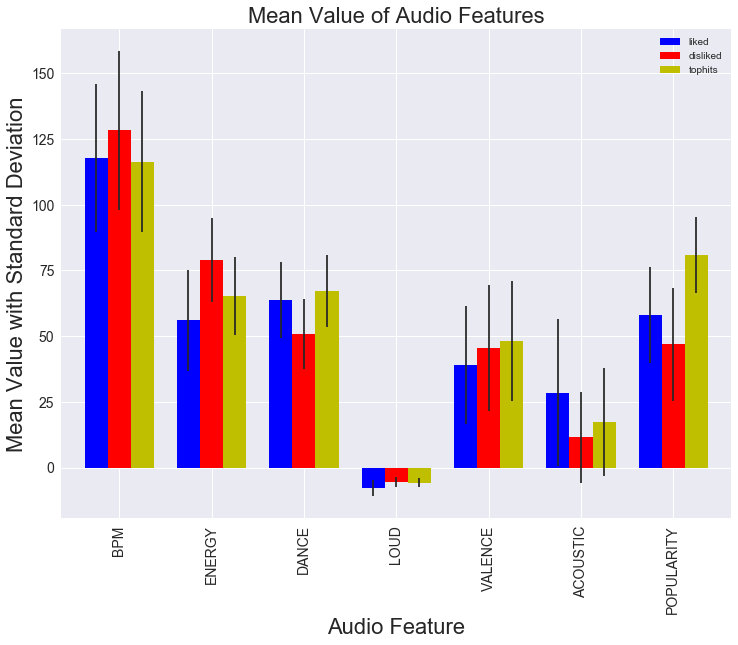

In [6]:
sns.set()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']
 
# SET WIDTH AND HEIGHT
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

# GROUPED BAR PLOTS
avgs = pd.concat([d1.iloc[1,:7].rename('liked'), 
                  d2.iloc[1,:7].rename('disliked'), 
                  d3.iloc[1,:7].rename('tophits')], axis=1).plot(kind='bar', 
                                                                 width=.75, 
                                                                 fontsize=14,
                                                                 yerr=[d1.iloc[2,:7], 
                                                                       d2.iloc[2,:7], 
                                                                       d3.iloc[2,:7]],
                                                                 color=['b','r','y'])

# SET TITLE AND LABELS 
avgs.set_title('Mean Value of Audio Features', fontsize=22)
avgs.set_xlabel('Audio Feature', fontsize=22)
avgs.set_ylabel('Mean Value with Standard Deviation', fontsize=22)

plt.show()

### 3.2. Distributions: Liked vs. Disliked Songs

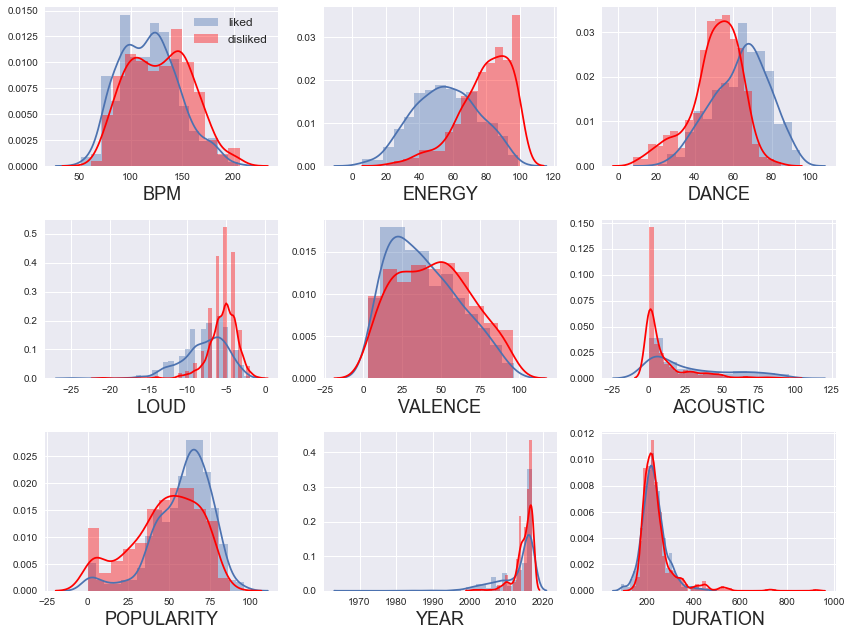

In [7]:
# USE SEABORN'S DISTRIBUTION PLOT
plt.subplot(331)
sns.distplot(liked.BPM, label='liked')
sns.distplot(disliked.BPM, color='r', label='disliked')
plt.xlabel('BPM', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(liked.ENERGY)
sns.distplot(disliked.ENERGY, color='r')
plt.xlabel('ENERGY', fontsize=18)

plt.subplot(333)
sns.distplot(liked.DANCE)
sns.distplot(disliked.DANCE, color='r')
plt.xlabel('DANCE', fontsize=18)

plt.subplot(334)
sns.distplot(liked.LOUD)
sns.distplot(disliked.LOUD, color='r')
plt.xlabel('LOUD', fontsize=18)

plt.subplot(335)
sns.distplot(liked.VALENCE)
sns.distplot(disliked.VALENCE, color='r')
plt.xlabel('VALENCE', fontsize=18)

plt.subplot(336)
sns.distplot(liked.ACOUSTIC)
sns.distplot(disliked.ACOUSTIC, color='r')
plt.xlabel('ACOUSTIC', fontsize=18)

plt.subplot(337)
sns.distplot(liked.POPULARITY)
sns.distplot(disliked.POPULARITY, color='r')
plt.xlabel('POPULARITY', fontsize=18)

plt.subplot(338)
sns.distplot(liked.YEAR)
sns.distplot(disliked.YEAR, color='r')
plt.xlabel('YEAR', fontsize=18)

plt.subplot(339)
sns.distplot(liked.DURATION)
sns.distplot(disliked.DURATION, color='r')
plt.xlabel('DURATION', fontsize=18)

plt.tight_layout()
plt.show()


### 3.3. Distributions: Liked vs. Today's Top Hits Songs

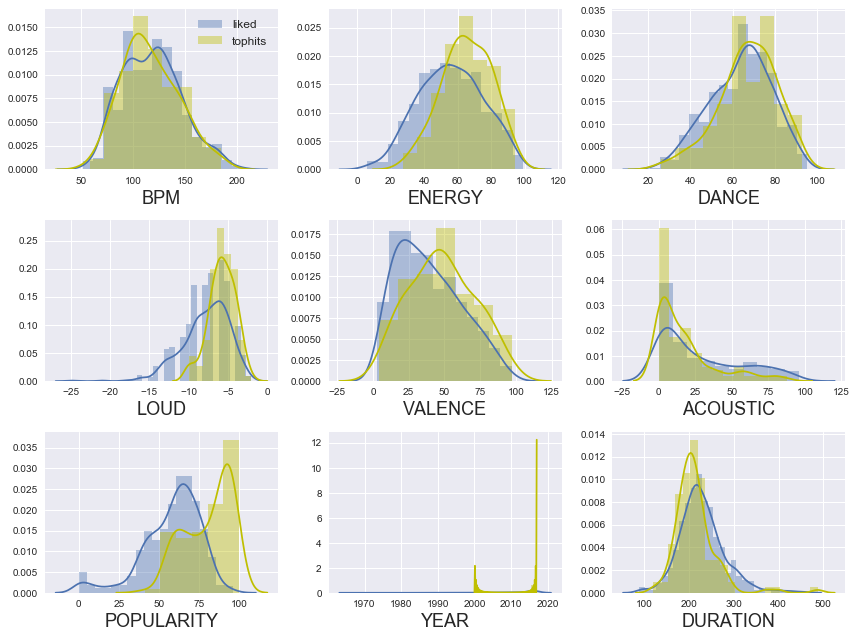

In [8]:
plt.subplot(331)
sns.distplot(liked.BPM, label='liked')
sns.distplot(tophits.BPM, color='y', label='tophits')
plt.xlabel('BPM', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(liked.ENERGY)
sns.distplot(tophits.ENERGY, color='y')
plt.xlabel('ENERGY', fontsize=18)

plt.subplot(333)
sns.distplot(liked.DANCE)
sns.distplot(tophits.DANCE, color='y')
plt.xlabel('DANCE', fontsize=18)

plt.subplot(334)
sns.distplot(liked.LOUD)
sns.distplot(tophits.LOUD, color='y')
plt.xlabel('LOUD', fontsize=18)

plt.subplot(335)
sns.distplot(liked.VALENCE)
sns.distplot(tophits.VALENCE, color='y')
plt.xlabel('VALENCE', fontsize=18)

plt.subplot(336)
sns.distplot(liked.ACOUSTIC)
sns.distplot(tophits.ACOUSTIC, color='y')
plt.xlabel('ACOUSTIC', fontsize=18)

plt.subplot(337)
sns.distplot(liked.POPULARITY)
sns.distplot(tophits.POPULARITY, color='y')
plt.xlabel('POPULARITY', fontsize=18)

plt.subplot(338)
sns.distplot(liked.YEAR)
sns.distplot(tophits.YEAR, color='y')
plt.xlabel('YEAR', fontsize=18)

plt.subplot(339)
sns.distplot(liked.DURATION)
sns.distplot(tophits.DURATION, color='y')
plt.xlabel('DURATION', fontsize=18)

plt.tight_layout()
plt.show()


<hr>
## <a id='machine_learning'>4. Machine Learning</a>

#### Features & Target Variables , Training / Testing Data

In [9]:
# IMPORT PACKAGES
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# ADD TARGET COLUMN, 1 FOR LIKED SONGS, 0 FOR DISLIKED SONGS
liked['TARGET'] = 1
disliked['TARGET'] = 0

# COMBINE LIKED and DISLIKED PLAYLIST
combined = pd.concat([liked,disliked], ignore_index=True)

# FEATURES & TARGET VARIABLE
features = combined[['BPM','ENERGY','DANCE','LOUD','VALENCE','ACOUSTIC','POPULARITY']]
target = combined['TARGET']

# TRAINING / TESTING DATA
X_train, X_test, y_train, y_test = train_test_split(features, target)

<hr>
### <a id='knn'>4.1. k-Nearest Neighbor Classifier</a>

#### Choosing Optimal k Number of Neighbors

The optimal number of neighbors is 7


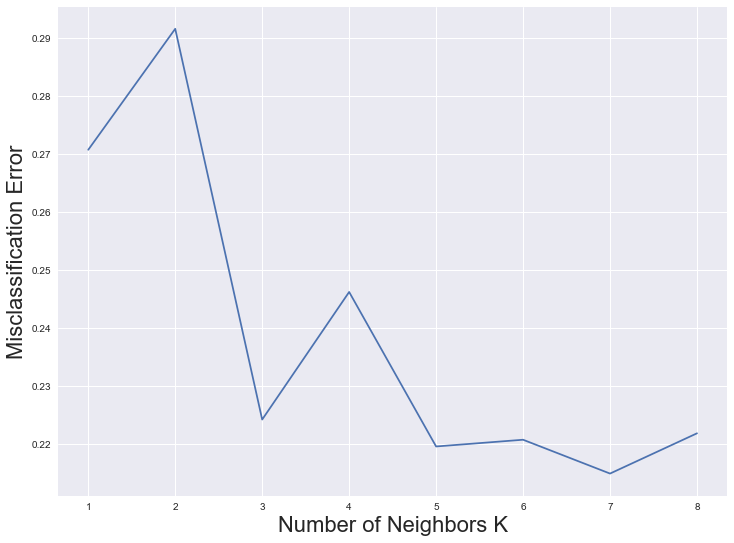

In [10]:
''' Following code from https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/ '''

# Setup 
neighbors = np.arange(1, 9)
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K', fontsize=22)
plt.ylabel('Misclassification Error', fontsize=22)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.show()

#### Using k-NN Classifier with k=7

In [32]:
# SETUP K-NN CLASSIFIER K=7
knn = KNeighborsClassifier(n_neighbors=7)

# FIT CLASSIFIER W/ K NEIGHBORS TO TRAINING DATA
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


#knn_score = knn.score(X_test, y_test)
knn_score = accuracy_score(y_test, y_pred)
print('Test Score:', knn_score)

Test Score: 0.805555555556


#### Testing Classifier Accuracy with New Liked Playlist

In [12]:
# GET NEW LIKED PLAYLIST
new_liked = pd.read_excel('Google Drive/Springboard/Capstone1/NEW_LIKES.xlsx')

# DROP MISSING DATA 
new_liked = new_liked.dropna().reset_index(drop=True)

# CHANGE COLUMN NAME FROM 'POP.' TO 'POPULARITY'
new_liked = new_liked.rename(columns=lambda x: x.replace('POP.', 'POPULARITY'))

# ADD 'YEAR' COLUMN FROM 'RELEASE' COLUMN & CONVERT OBJECT TYPE TO NUMERIC TYPE
new_liked['YEAR'] = new_liked['RELEASE'].astype(str).str[0:4]
new_liked['YEAR'] = new_liked['YEAR'].convert_objects(convert_numeric=True)

# OBJECT TYPE INTO NUMERIC TYPE IN 'LENGTH' COLUMN 
new_liked['MINUTES'] = new_liked['LENGTH'].astype(str).str[0:2].convert_objects(convert_numeric=True)
new_liked['SECONDS'] = new_liked['LENGTH'].astype(str).str[3:5].convert_objects(convert_numeric=True)

# CONVERT MINUTES TO SECONDS & ADD 'DURATION' COLUMN, DROP 'LENGTH', 'MINUTES', 'SECONDS', AND 'RELEASE' COLUMNS
new_liked['DURATION'] = new_liked['MINUTES'] * 60 + new_liked['SECONDS']
new_liked = new_liked.drop(['LENGTH','MINUTES', 'SECONDS', 'RELEASE'], 1)

/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/Users/ahipolito94/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [13]:
# APPLY K-NN CLASSIFIER TO NEW LIKED PLAYLIST
new_test = new_liked[['BPM','ENERGY','DANCE','LOUD','VALENCE','ACOUSTIC','POPULARITY']]
new_pred = knn.predict(new_test)

knn_pred = knn.predict(new_test)
knn_new_score = sum(new_pred) / len(new_test)
print('Test Score:', knn_new_score)

Test Score: 0.733333333333


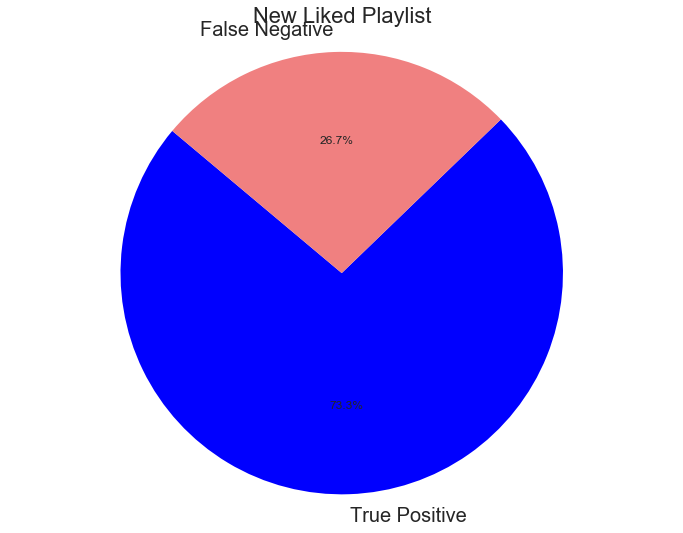

In [14]:
# DATA
labels = 'True Positive', 'False Negative'
sizes = [sum(new_pred), (len(new_test) - sum(new_pred))]
colors = ['blue', 'lightcoral']
 
# PLOT
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
 
plt.axis('equal')
plt.title('New Liked Playlist', fontsize=22)
plt.rcParams['font.size'] = 18
plt.show()


<hr>
### <a id='gnb'>4.2. Gaussian Naive Bayes Classifier</a>

In [15]:
# IMPORT PACKAGES
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [16]:
# APPLY MODEL & SCORE 
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_y_pred = gnb_model.predict(X_test)
gnb_score = accuracy_score(y_test, gnb_y_pred, normalize = True)
print('Gaussian Naive Bayes Test Score:', gnb_score)

Gaussian Naive Bayes Test Score: 0.777777777778


In [17]:
# APPLY NEW TEST & NEW SCORE
gnb_new_pred = gnb_model.predict(new_test)
gnb_new_score = sum(gnb_new_pred) / len(new_test)
print('New Test Score:', gnb_new_score)

New Test Score: 0.666666666667


<hr>
### <a id='dtc'>4.3. Decision Trees Classifier</a>

In [18]:
# IMPORT PACKAGES
from sklearn import tree

In [19]:
# APPLY MODEL & SCORE
dtc_model = tree.DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
dtc_y_pred = dtc_model.predict(X_test)

dtc_score = accuracy_score(y_test, dtc_y_pred)
print('Decision Trees Test Score:', dtc_score)

Decision Trees Test Score: 0.725694444444


In [20]:
# APPLY NEW TEST & NEW SCORE
dtc_new_pred = dtc_model.predict(new_test)
dtc_new_score = sum(dtc_new_pred) / len(new_test)
print('New Test Score:', dtc_new_score)

New Test Score: 0.633333333333


<hr>
### <a id='svm'>4.4. Support Vector Machine (SVM) Classifier</a>

In [21]:
# IMPORT PACKAGES
from sklearn.svm import SVC

In [22]:
# APPLY MODEL & SCORE
svm_model = SVC(kernel='linear', C=1, gamma=1) 
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

svm_score = accuracy_score(y_test, svm_y_pred)
print('SVM Test Score:', svm_score)

SVM Test Score: 0.78125


In [23]:
# APPLY NEW TEST & NEW SCORE
svm_new_pred = svm_model.predict(new_test)
svm_new_score = sum(svm_new_pred) / len(new_test)
print('New Test Score:', svm_new_score)

New Test Score: 0.833333333333


<hr>
### <a id='sgd'>4.5. Stochastic Gradient Descent (SGD) Classifier</a>

In [24]:
# IMPORT PACKAGES
from sklearn.linear_model import SGDClassifier

In [25]:
# APPLY MODEL & SCORE
sgd_model = SGDClassifier(loss="hinge", penalty="l2") 
sgd_model.fit(X_train, y_train)
sgd_y_pred = sgd_model.predict(X_test)

sgd_score = accuracy_score(y_test, sgd_y_pred)
print('SVM Test Score:', sgd_score)

SVM Test Score: 0.604166666667


/Users/ahipolito94/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [26]:
# APPLY NEW TEST & NEW SCORE
sgd_new_pred = sgd_model.predict(new_test)
sgd_new_score = sum(sgd_new_pred) / len(new_test)
print('New Test Score:', sgd_new_score)

New Test Score: 0.933333333333


<hr>
### <a id='compare'>4.6. Comparing Classifiers</a>

In [27]:
from decimal import *

classifier = ['k-Nearest Neighbor', 'Gaussian Naive Bayes', 
              'Decision Trees', 'Support Vector Machine', 'Stochastic Gradient Descent']

accuracy_scores = [knn_score, gnb_score, dtc_score, svm_score, sgd_score]
accuracy_scores = [float(Decimal("%.2f" % e)) for e in accuracy_scores]

new_scores = [knn_new_score, gnb_new_score, dtc_new_score, svm_new_score, sgd_new_score]
new_scores = [float(Decimal("%.2f" % e)) for e in new_scores]

comparison = pd.DataFrame(list(zip(classifier, accuracy_scores, new_scores)),
              columns=['Classifier','Accuracy_Scores','New_Scores'])
comparison

,Classifier,Accuracy_Scores,New_Scores
0,k-Nearest Neighbor,0.81,0.73
1,Gaussian Naive Bayes,0.78,0.67
2,Decision Trees,0.73,0.63
3,Support Vector Machine,0.78,0.83
4,Stochastic Gradient Descent,0.60,0.93


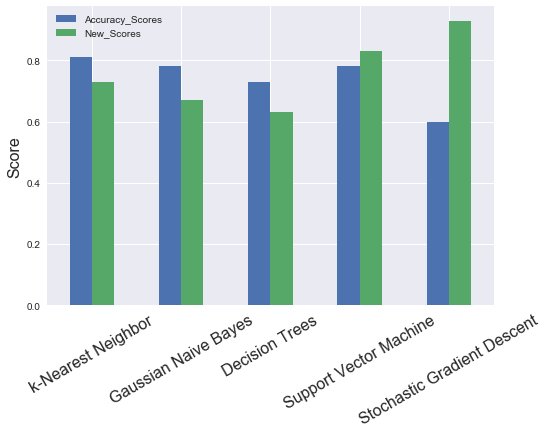

In [28]:
sns.set()
ax = comparison.plot.bar()
ax.set_xticklabels(comparison['Classifier'], rotation=30, fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.legend(loc='best')

plt.show()

<hr>

## <a href='#top'>Back to Top ^</a>

<hr>